In [1]:
#libraries
import numpy as np 
import pandas as pd
import math
import random

#preproccesing
from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

# visulization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

 # Part C

neural network using sklearn

In [2]:
def sigmoid(x):
    print(x)
    return 1 / (1 + math.exp(-x))

In [3]:
class NeuralNetwork:
    def __init__(self, learning_rate, train,hidden_layers):
        self.train=train
        self.clf=MLPClassifier(solver='lbfgs', alpha=learning_rate,hidden_layer_sizes=hidden_layers, random_state=1)

    def fit(self):
        train_x=self.train[["x","y"]]
        train_y=self.train[["value"]]
        self.clf.fit(train_x,train_y)

    def predict(self, test):
        test_x=test[["x","y"]]
        predicted=self.clf.predict(test_x)
        test['pred']=predicted
        return predicted

    def score(self, test, predicted):
        i=0
        count=0
        for index, row in test.iterrows():
            if row["value"]==predicted[i]:
                count +=1
            i+=1
        return round(count/i, 4)
    import math


    def lookin(self,data):
        listx=[]
        listy=[]
        for index, row in data.iterrows():
            listx.append(row["x"])
            listy.append(row["y"])
        l=[listx,listy]
        for i in range(len(self.clf.coefs_)):
            datac=data.copy()
            l=(self.lookinlayer(datac,l,self.clf.coefs_[i],self.clf.intercepts_[i]))


    def lookinlayer(self,data,lastlayers,weight,bias):
        count = 0
        rlist=[]
        # for each row we use the activation formula with the weights and bias we returned
        # in the fit function to predict on the test data set
        for k in range(len(bias)):
            pred1 = []
            predictionlist=[]
            for j in range(len(data)):
                prediction = bias[k]
                for i in range(len(lastlayers)):
                    prediction += (lastlayers[i][j] * weight[i][k])
#                 predictionlist.append(prediction)
                if prediction > 0:
                    predictionlist.append(prediction)
                    prediction = 1
                else:
                    predictionlist.append(0)
                    prediction = -1
                pred1.append(prediction)
        # now add the prediction list to the data set in order to make comparison
            rlist.append(predictionlist)
            data['pred']=pred1
            plotting_test(data)    
        return rlist  
    
    # same as lookinlayer but without the plotting
    def lookinlayer1(self,data,lastlayers,weight,bias):
        count = 0
        rlist=[]
        # for each row we use the activation formula with the weights and bias we returned
        # in the fit function to predict on the test data set
        for k in range(len(bias)):
            pred1 = []
            predictionlist=[]
            for j in range(len(data)):
                prediction=0
                for i in range(len(lastlayers)):
                    prediction =prediction+ bias[k] + (lastlayers[i][j] * weight[i][k])
#                 predictionlist.append(prediction)
                if prediction > 0:
                    predictionlist.append(prediction)
                    prediction = 1
                else:
                    predictionlist.append(0)
                    prediction = -1
                pred1.append(prediction)
        # now add the prediction list to the data set in order to make comparison
            rlist.append(predictionlist)
            data['pred']=pred1  
        return rlist

    def getLastHiddenLayerInfo(self,data):
            listx=[]
            listy=[]
            val=[]        

#             for index, row in self.train.iterrows():
            for index, row in data.iterrows():
                listx.append(row["x"])
                listy.append(row["y"])
                val.append(row["value"])
            l=[listx,listy]
            for i in range(len(self.clf.coefs_)-1):
                data=self.train.copy()
                l=(self.lookinlayer1(data,l,self.clf.coefs_[i],self.clf.intercepts_[i]))
            l.append(val)
            return l


In [4]:
# this function builds the data set for part A of the assighnment
def build_data_partA(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if y > 1 then the value is 1
        if y[i] > 1:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df

In [5]:
# this function builds the data set for part B of the assighnment
def build_data_partB(i):
    x = []
    y = []
    value = []
    random.seed(i)
    for i in range(700):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-10000, 10000)
        randY = random.randint(-10000, 10000)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)
    for i in range(700,1000):
        # generate two random numbers between -10000 to 10000
        randX = random.randint(-300, 300)
        randY = random.randint(-300, 300)
        x.append(randX / 100)
        y.append(randY / 100)
        # for part A if (4 <= y^2 + x^2 <= 9) then the value is 1
        if 4 <= (y[i] ** 2 + x[i] ** 2) <= 9:
#         if 25<=(y[i]**2+x[i]**2)>=2500:
            value.append(1)
        # else the value is -1
        else:
            value.append(-1)

    # make the data frame
    end = {'x': x, 'y': y, 'value': value}
    df = pd.DataFrame(data=end, columns=['x', 'y', 'value'])
    return df


In [6]:
# this function plots the values of the actual values of the data compared to the prediction values we predicted
def plotting_test(test):
    f, ax = plt.subplots(1, 2)
    ax[0].set_title("value")
    ax[1].set_title("predict")

    for index, row in test.iterrows():
        if row['value'] == 1:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[0].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
       
        if row['pred'] == 1:
             ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            ax[1].plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()

def plotting_train(train):
    for index, row in train.iterrows():
        if row['value'] == 1:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.show()
    for index, row in train.iterrows():
        if row['value'] == 1:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="blue")
        else:
            plt.plot(row['x'], row['y'], markersize=2, marker="o", color="red")
    plt.xlim([-3, 3])  
    plt.ylim([-3, 3])
    plt.show()

In [7]:
# this function plots the confussion matrix
def confussion_matrix (cf_matrix):
    group_names = ['true pos', 'false pos', 'false neg', 'true neg']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

## Part C main

plotting train


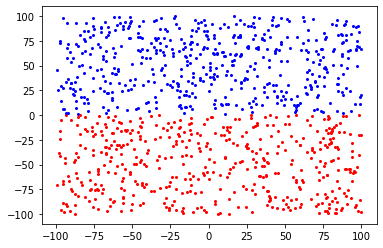

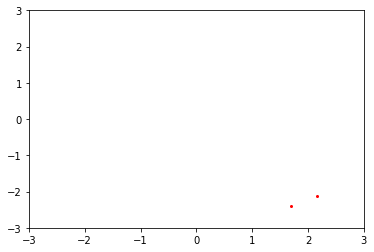

first test
0.998
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       510
           1       1.00      1.00      1.00       490

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



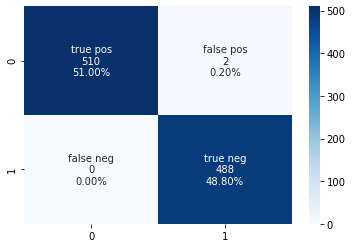

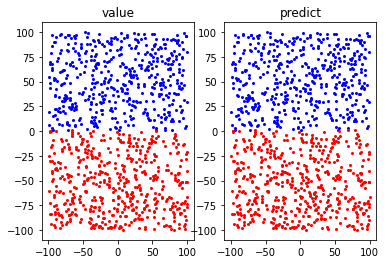

second test
1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       486
           1       1.00      1.00      1.00       514

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



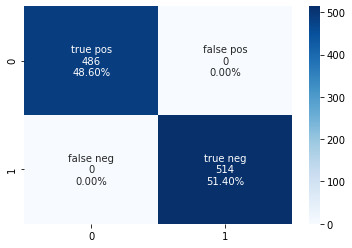

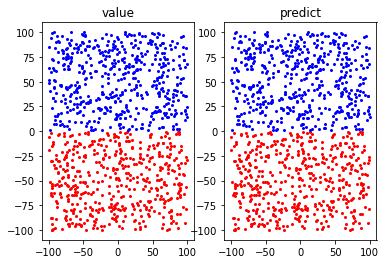

In [8]:
train = build_data_partA(1)
net1=NeuralNetwork(0.1,train,(4,4))
net1.fit()
print("plotting train")
plotting_train(train)
# net1.lookin(train)

print("first test")
first_test = build_data_partA(9)
test_y=first_test[["value"]]
pred1=net1.predict(first_test)
print(net1.score(first_test,pred1))
con_mat1 = confusion_matrix(pred1,test_y)
confussion_matrix(con_mat1)
print(classification_report(test_y, pred1))
plotting_test(first_test)



print("second test")
second_test = build_data_partA(8)
test_y=second_test[["value"]]
pred2=net1.predict(second_test)
print(net1.score(second_test,pred2))
con_mat2 = confusion_matrix(pred2,test_y)
confussion_matrix(con_mat2)
print(classification_report(test_y, pred2))
plotting_test(second_test)

In [9]:
# net1.lookin(first_test)

In [10]:
# net1.lookin(second_test)

part b:

In [11]:
# using relu
# (5,2) ~0.935
# (5,10,10,5) ~ 0.985
# (5,10,10,10,5) ~0.975
# (10,20,10,5) ~0.975
# (10,5) ~0.98

# using sigmoid
# (5,2) ~0.935
# (10,5) ~0.98

plotting train


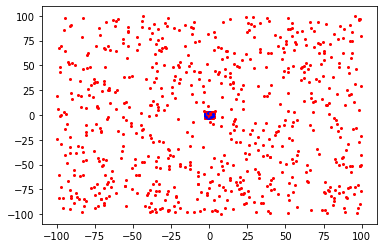

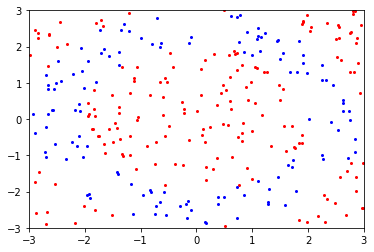

first test
0.983
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       870
           1       0.95      0.92      0.93       130

    accuracy                           0.98      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000



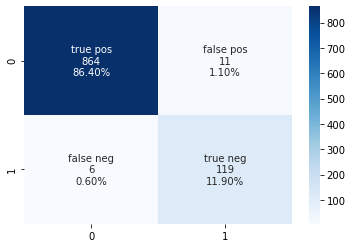

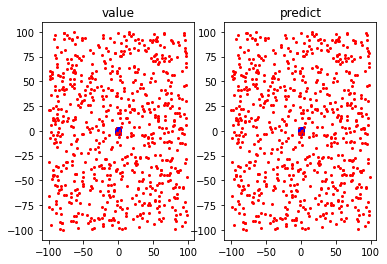

second test
0.987
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       867
           1       0.95      0.95      0.95       133

    accuracy                           0.99      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.99      0.99      0.99      1000



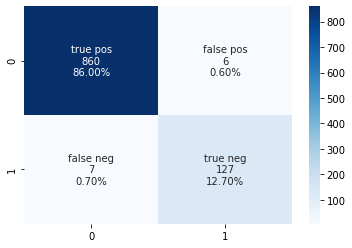

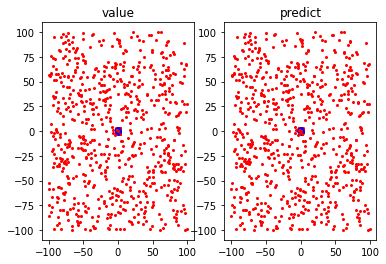

In [30]:
trainb = build_data_partB(9)
net2=NeuralNetwork(0.01,trainb,(5,10,10,5))
net2.fit()
print("plotting train")
plotting_train(trainb)
# net2.lookin(trainb)

print("first test")
first_testb = build_data_partB(3)
test_yb=first_testb[["value"]]
pred1=net2.predict(first_testb)
print(net2.score(first_testb,pred1))
con_mat1 = confusion_matrix(pred1,test_yb)
confussion_matrix(con_mat1)
print(classification_report(test_yb, pred1))
plotting_test(first_testb)



print("second test")
second_testb = build_data_partB(7)
test_yb=second_testb[["value"]]
pred2=net2.predict(second_testb)
print(net2.score(second_testb,pred2))
con_mat2 = confusion_matrix(pred2,test_yb)
confussion_matrix(con_mat2)
print(classification_report(test_yb, pred2))
plotting_test(second_testb)

In [31]:
# net2.lookin(first_testb)

In [32]:
# net2.lookin(second_testb)

# part D

In [135]:
class Adaline:
    def __init__(self, learning_rate, train, num):
        self.learning_rate = learning_rate
        self.train = train
        self.num=num # number of neurons in last layer

    # this function generates random small weights and bias for the Adaline algorithm
    def _weight_genarate(self,num):
        weight = [] 
        for i in range(num):
            random.seed(i)
            rand = random.uniform(-1.0, 1.0)
            rand = round(rand, 4)
            weight.append(rand)
        print("start weights = \n", weight)
        # now generate the bias 
        random.seed(4)
        bias = random.uniform(0, 1)
        bias = round(bias, 4)
        return weight, bias

    # this function fits the adaline model on the training data 
    def fit(self):
        ERR = []
        mse = []
        EPS = 0.0001
        # generate weights and bias
        weight, bias = self._weight_genarate(self.num)
        oldmse=1
        count=0
        changed=0
        increase=22
#         while(True):
        while(count<90):
            if(count==increase):
                self.learning_rate=self.learning_rate/2
                increase+=22
            ERR = []
            # for each row we fix the bias and wights in order to get the minimum error
            for index, row in self.train.iterrows():
                predicted=bias/100
                for i in range(self.num):
                    predicted += row[i]/1000 * weight[i]
                for k in range(len(weight)):
                    weight[k] = round((weight[k] + self.learning_rate * (row["value"]-predicted) * row[k]/1000),3)
                bias= round((bias + self.learning_rate * (row["value"]-predicted)),3)
                # error calculation
                error = (row["value"] - predicted) ** 2
                # if the error is small enough return
                ERR.append(error)
            mse.append(np.sum(ERR))
            print(mse[-1])
            if len(mse) >= 2:
                # checking if the error is smaller then eps or if it hasnt changed
                if abs(mse[-1] - mse[-2]) < EPS  or abs(mse[-1] - mse[-2])==oldmse :
                    break
            # updating the old mse
            if len(mse)>=2:
                oldmse=abs(mse[-1] - mse[-2])
            count+=1
        return weight, bias

    

    
    
#     # this function predicts on a test data and returns the number of correct predictions
    def predict(self, dftest, test, weight, bias):
        count = 0
        pred = []
        # for each row we use the activation formula with the weights and bias we returned
        # in the fit function to predict on the test data set
        for index, row in dftest.iterrows():
            predicted=bias/100
            for i in range(self.num):
                predicted += row[i]/1000 * weight[i]
#             print(predicted)
            if predicted > 0:
                predicted = 1
            else:
                predicted = -1
            pred.append(predicted)

            if predicted == row['value']:
                count += 1
        # now add the prediction list to the data set in order to make comparison 
        test['pred'] = pred
        return count

    # this function caculates the acuuracy of the predictions
    def score(self, pred, dftest):
        acurr = pred / len(dftest)
        res = round(acurr, 4)
        return res

net last layer weight=
 [[ 2.12396395]
 [-1.45058846]
 [ 0.39187076]
 [-0.37723594]]
start weights = 
 [0.6888, -0.7313, 0.9121, -0.5241]
260.31512289186367
251.54051594525447
251.336394962094
251.16868184558024
251.01699015285104
250.86737150401046
250.7155370579995
250.5587831052453
250.4103686083243
250.25904950821547
250.11675024510401
249.97160793640373
249.82393891456599
249.67958497855258
249.54347744862872
249.40071331038087
249.2677257795379
249.12750919051757
248.99052474604136
248.85601266959338
248.7240909010448
248.58956238239597
246.44905634460252
246.27667643489787
246.20129054916717
246.12743344264265
246.06156197766825
245.99264330264563
245.92916388895634
245.86520280575667
245.80201174119458
245.7389464964871
245.67472707940948
245.608743829565
245.54510726470411
245.48351127201585
245.42296403427065
245.36038095694036
245.29921047658138
245.23487839484505
245.17565708356068
245.10994075331394
245.04926118908764
244.9853164986688
243.8397554700934
243.8020934056359
2

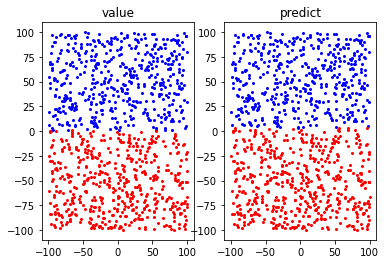

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99       510
           1       1.00      0.98      0.99       490

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



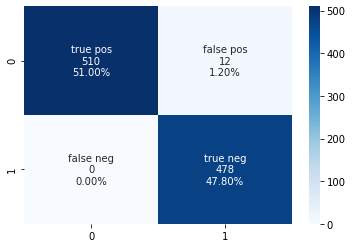

In [136]:
# create train df
traina=build_data_partA(1)
listA=net1.getLastHiddenLayerInfo(traina)
dftrain=pd.DataFrame()
for i in range(len(listA)):
    if(i<len(listA)-1):
        dftrain[i]=listA[i]
    else:
        dftrain["value"]=listA[i]

# create test df
test = build_data_partA(9)
newtest = net1.getLastHiddenLayerInfo(test)
dftest = pd.DataFrame()
for i in range(len(newtest)):
    if(i<len(newtest)-1):
        dftest[i]=newtest[i]
    else:
        dftest["value"]=newtest[i]
print("net last layer weight=\n",net1.clf.coefs_[-1])
ada1 = Adaline(0.9, dftrain, len(listA)-1)
weight, bias = ada1.fit()
print("ada weight =\n",weight)
count=ada1.predict(dftest, test, weight, bias)
print(ada1.score(count, dftest))
plotting_test(test)
con_mat1 = confusion_matrix(test["pred"],test["value"])
confussion_matrix(con_mat1)
print(classification_report(test["value"],test["pred"]))

net last layer weight=
 [[-2.08481307]
 [ 0.75202778]
 [-1.25638042]
 [-4.60876168]
 [ 2.85063458]]
start weights = 
 [0.6888, -0.7313, 0.9121, -0.5241, -0.5279]
1.371131172283122e+19
6.596321486470387e+31
3.173396218325697e+44
1.5266756750923703e+57
7.34461900300802e+69
3.533391484480181e+82
1.6998642649107074e+95
8.177804615797815e+107
3.934225203427064e+120
1.8926996521021303e+133
9.105508169555734e+145
4.380530156158672e+158
2.1074106015493633e+171
1.013845193435913e+184
4.8774646739341685e+196
2.3464787128744633e+209
1.1288574532169493e+222
5.4307722575602555e+234
2.6126671024263767e+247
1.2569168921783625e+260
6.046847959987585e+272
2.909052339000259e+285
2.99418328348783e+283
1.7763789724136228e+282
5.808177429138392e+281
2.0833157224196532e+281
8.75319189659071e+280
4.482699425301294e+280
2.726517626472692e+280
1.848350842692186e+280
1.3249861183087436e+280
9.756944569034648e+279
7.285095548982238e+279
5.48651335614027e+279
4.1595841766009053e+279
3.172504092182753e+279
2.43360

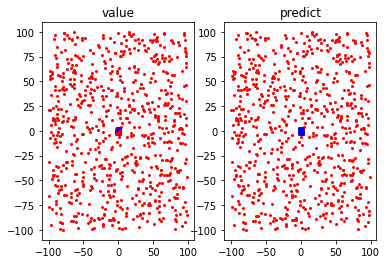

              precision    recall  f1-score   support

          -1       1.00      0.82      0.90       870
           1       0.46      1.00      0.63       130

    accuracy                           0.84      1000
   macro avg       0.73      0.91      0.76      1000
weighted avg       0.93      0.84      0.87      1000



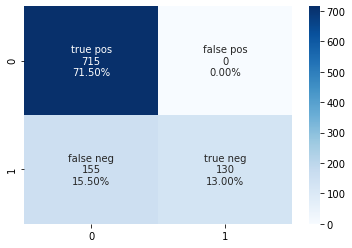

In [137]:
trainb=build_data_partB(9)
listA=net2.getLastHiddenLayerInfo(trainb)
dftrain=pd.DataFrame()
for i in range(len(listA)):
    if(i<len(listA)-1):
        dftrain[i]=listA[i]
    else:
        dftrain["value"]=listA[i]

testb=build_data_partB(3)
listB=net2.getLastHiddenLayerInfo(testb)
dftest=pd.DataFrame()
for i in range(len(listB)):
    if(i<len(listB)-1):
        dftest[i]=listB[i]
    else:
        dftest["value"]=listB[i]
print("net last layer weight=\n",net2.clf.coefs_[-1])        
adab=Adaline(0.752, dftrain, len(listA)-1)
weight,bias =adab.fit()
print("ada weight =\n",weight)
count=adab.predict(dftest,testb,weight, bias)
print(adab.score(count, dftest))
plotting_test(testb)
con_mat1 = confusion_matrix(testb["pred"],testb["value"])
confussion_matrix(con_mat1)
print(classification_report(testb["value"],testb["pred"]))

In [134]:
# (5,10,10,5)
# lr=0.75
# 50 epoch every 20 divide by 2 lr

#0.837

In [ ]:
# (5,10,10,5)
# lr=0.752
# 50 epoch every 22 divide by 2 lr

#0.837

In [ ]:
# (5,10,10,5)
# lr=0.745
# 50 epoch every 22 divide by 2 lr
# 0.836

In [117]:
# (5,10,10,5)
# lr=0.745
# 70 epoch every 22 divide by 2 lr
# 0.841

0.841

In [ ]:
# (5,10,10,5)
# lr=0.745
# 90 epoch every 22 divide by 2 lr

# 0.845

In [ ]:
# (5,10,10,5)
# lr=0.745
# 132 epoch every 22 divide by 2 lr

# 0.842